In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

import keras
from keras import layers
from keras import  Sequential


In [2]:
data_train_path="mask/Train/"
data_test_path="mask/Test/"
data_val_path="mask/Validation/"

In [3]:
img_width= 64
img_height=64

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 10000 files belonging to 2 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
data_val=keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 800 files belonging to 2 classes.


In [7]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 992 files belonging to 2 classes.


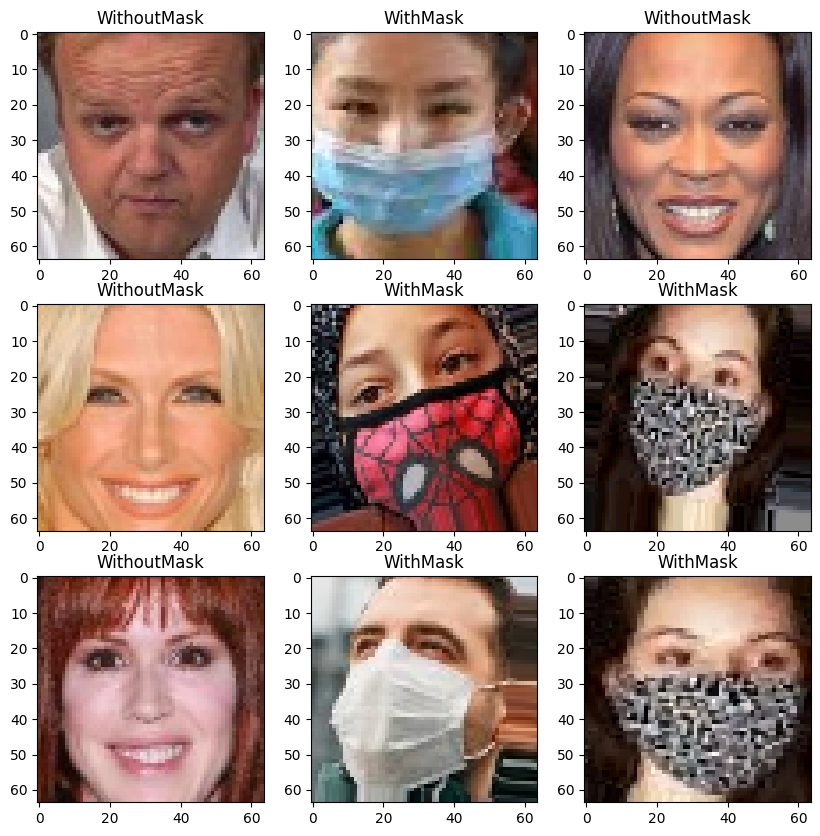

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])

In [9]:
from keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))
])


In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/25


313/313 [==============================] - 28s 80ms/step - loss: 0.1626 - accuracy: 0.9363 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 2/25
313/313 [==============================] - 9s 30ms/step - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.0386 - val_accuracy: 0.9862
Epoch 3/25
313/313 [==============================] - 9s 29ms/step - loss: 0.0365 - accuracy: 0.9874 - val_loss: 0.0130 - val_accuracy: 0.9950
Epoch 4/25
313/313 [==============================] - 9s 30ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0256 - val_accuracy: 0.9887
Epoch 5/25
313/313 [==============================] - 9s 29ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0340 - val_accuracy: 0.9912
Epoch 6/25
313/313 [==============================] - 10s 32ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0218 - val_accuracy: 0.9925
Epoch 7/25
313/313 [==============================] - 10s 32ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0331 - val_accuracy: 0

Text(0.5, 1.0, 'Loss')

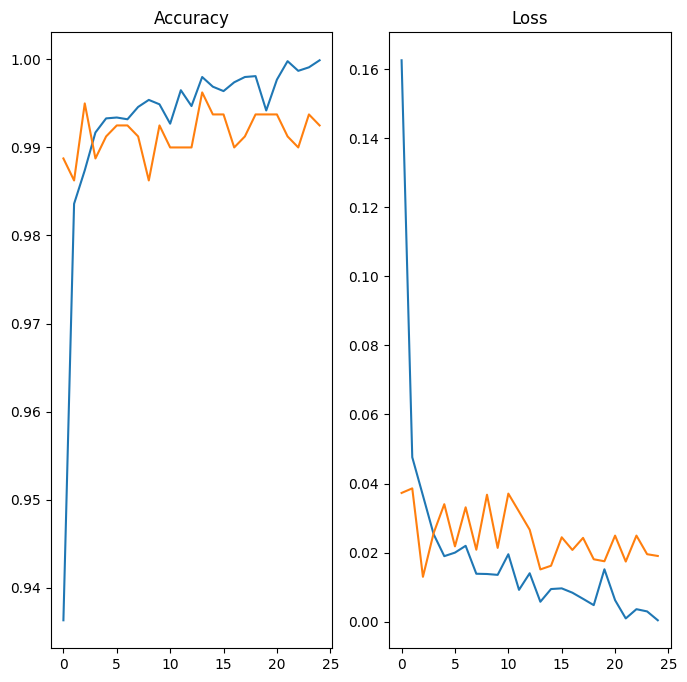

In [14]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Trainin Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Trainin loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [48]:
image='download2.jpeg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [49]:
predict=model.predict(img_bat)

1/1 [==============================] - 0s 44ms/step


In [50]:
score=tf.nn.softmax(predict)

In [51]:
print(data_cat[np.argmax(score)],np.max(score)*100)

WithMask 99.9998927116394


In [35]:
model.save('maskdetection.keras')

In [5]:
from ultralytics import YOLO
import cv2

# Load the YOLOv8 model
model = YOLO(r'M:/mask/detect/weapondetction1_train/weights/best.pt')

# Path to the image you want to test
image_path = 'download.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Perform inference
results = model(img)

# Check if there are multiple results
if isinstance(results, list):
    # Iterate over each result and visualize
    for i, result in enumerate(results):
        # Use results[i].show() instead of results.show()
        result_img = result.show()
        cv2.imshow(f'Test Image {i}', result_img)
else:
    # Use results.show() directly if there's a single result
    result_img = results.show()
    cv2.imshow('Test Image', result_img)

cv2.waitKey(0)
cv2.destroyAllWindows()



0: 448x640 1 gun, 74.0ms
Speed: 1.3ms preprocess, 74.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


AttributeError: 'Results' object has no attribute 'show'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    